## Introduction

## Importing Packages and Data

In [125]:
import pandas as pd
import numpy as np
import os
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sns.set_theme(style="dark")


import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
path = os.getcwd() + '/Data/'

filename = [f for f in os.listdir(path) if '.csv' in f][0]
df = pd.read_csv(path + filename,low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [3]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


## Data Cleaning

### Evaluation of Fields

In this section we will investigate fields in this data set, to see if there are any null values, the uniqueness of each field, and to gauge if these will be suitable for our model in the later section

#### Nulls

As seen below, there are no missing values for any of the fields, thus no need to fill in any missing values

In [4]:
cols_cat = [x for x in df if df[x].dtype=='object']
cols_drop = []
dfc = df.copy()

In [5]:
mv = dfc.isnull().sum().sort_values(ascending=False).to_frame('Missing Values')
mv['% missing'] = round(mv['Missing Values']/df.shape[0]*100)
mv = mv.merge(df.nunique().to_frame('Unique Values'),right_index=True,left_index=True).sort_index()
describe = df.describe().T
mv = mv.merge(describe,how='left',left_index=True,right_index=True)
mv.loc[mv['count'].notnull(),'Type'] = 'number'
mv['Type'].fillna('string',inplace=True)
mv['mean'] = mv['mean'].round(3)

In [6]:
mv1 = mv.copy()
# Fields that are integer and have less than 7 unique values -> Categorical
col_num_to_string = list(mv1[(mv1['Type']=='number') & (mv1['Unique Values']<7)].index)
col_num_to_string.append('EmployeeID')
mv1.loc[col_num_to_string,[i for i in describe]] = np.nan
mv1.loc[col_num_to_string,'Type'] = 'string'

cols_number = mv1[mv1['Type']=='number'].index

mv1

,Missing Values,% missing,Unique Values,count,mean,std,min,25%,50%,75%,max,Type
Age,0,0.0,43,1676.0,36.866,9.129126,18.0,30.00,36.0,43.00,60.0,number
Attrition,0,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string
BusinessTravel,0,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string
DailyRate,0,0.0,886,1676.0,800.558,401.594438,102.0,465.00,796.5,1157.00,1499.0,number
Department,0,0.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string
DistanceFromHome,0,0.0,29,1676.0,9.222,8.158118,1.0,2.00,7.0,14.00,29.0,number
Education,0,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string
EducationField,0,0.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string
EmployeeCount,0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string
EmployeeID,0,0.0,1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,string


##### Rate
Do we need all the rate columns: Hourly, Daily, Monthly? Will they be correlated with each other? From below, it does not look like they are highly correlated, in fact we see some negative correlation which does not make sense

In [7]:
df[[x for x in df if 'Rate' in x]].corr()

,DailyRate,HourlyRate,MonthlyRate
DailyRate,1.000000,0.027128,-0.032211
HourlyRate,0.027128,1.000000,-0.025597
MonthlyRate,-0.032211,-0.025597,1.000000


#### * Unique Values
There are values where there is only one missing value, lets look at those. Since these fields have only one unique value, this does not add any information to any analysis we might do

In [8]:
print ('The following fiels have only 1 unique value:')
for i in mv[mv['Unique Values']==1].index:
    cols_drop.append(i)
    print (' ',i,':',df[i].unique())

The following fiels have only 1 unique value:
  EmployeeCount : [1]
  Over18 : ['Y']
  StandardHours : [80]


In [9]:
print ('The following fiels have only 2 unique value:')
for i in mv[mv['Unique Values']==2].index:
    print (' ',i,':',df[i].unique())

The following fiels have only 2 unique value:
  Attrition : ['No' 'Yes']
  Gender : ['Female' 'Male']
  OverTime : ['Yes' 'No']
  PerformanceRating : [3 4]


For the fields with two unique values, only one does not make sense, which is performance rating, which is either 3 or 4. We might convert his to a field that is "performance rating 4" and it is either 1 (if its 4) or 0 (if its 3). Same goes for other binary variables: Overtime, Attrition (dependent variable), and Gender.

#### * Converting Some Integer Columns to Strings
#### * Turning Dependent Variable into Binary

For the dependent variable, Attrition, we need to turn from True/False to 1 or 0

In [10]:
df1 = df.copy()
# Converting these columns from integer to string
df1[col_num_to_string] = df1[col_num_to_string].applymap(str)
df1 = df1.drop(cols_drop,axis=1)
# Attrition from T/F to 1/0
df1['Attrition'] = df1['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
# Overtime
df1['OverTime'] = df1['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)

# Performance Rating
df1['PerformanceRating_4'] = df1['PerformanceRating'].copy()
# For Performance Rating, it is only a 3 or 4, we will need to modify this
df1['PerformanceRating_4'] = df1['PerformanceRating_4'].apply(lambda x: 1 if x=='4' else 0)
# Gender
df1['Gender_F'] = df1['Gender'].copy()
# For Performance Rating, it is only a 3 or 4, we will need to modify this
df1['Gender_F'] = df1['Gender_F'].apply(lambda x: 1 if x=='Female' else 0)

df1['Attrition'] = df1['Attrition'].astype(str)
df1['OverTime'] = df1['OverTime'].astype(str)
df1['Gender_F'] = df1['Gender_F'].astype(str)
df1['PerformanceRating_4'] = df1['PerformanceRating_4'].astype(str)

df1 = df1.drop(['PerformanceRating','Gender'],axis=1)

In [11]:
# Number columns
df_numbers = df1.select_dtypes(include=np.number)
col_numbers = list(df_numbers.columns)

In [201]:
# String Columns
df_string = df1.select_dtypes(exclude=np.number)
df_string = df_string.drop(['EmployeeID'],axis=1)
col_string = df_string.columns.tolist()

### Distribution of integer/float columns
Below are box plots and histograms of numbered columns

#### Box Plots
Box Plot contains the following:

    1. Minimum
    2. First Quartile or 25%
    3. Median (Second Quartile) or 50%
    4. Third Quartile or 75%
    5. Maximum

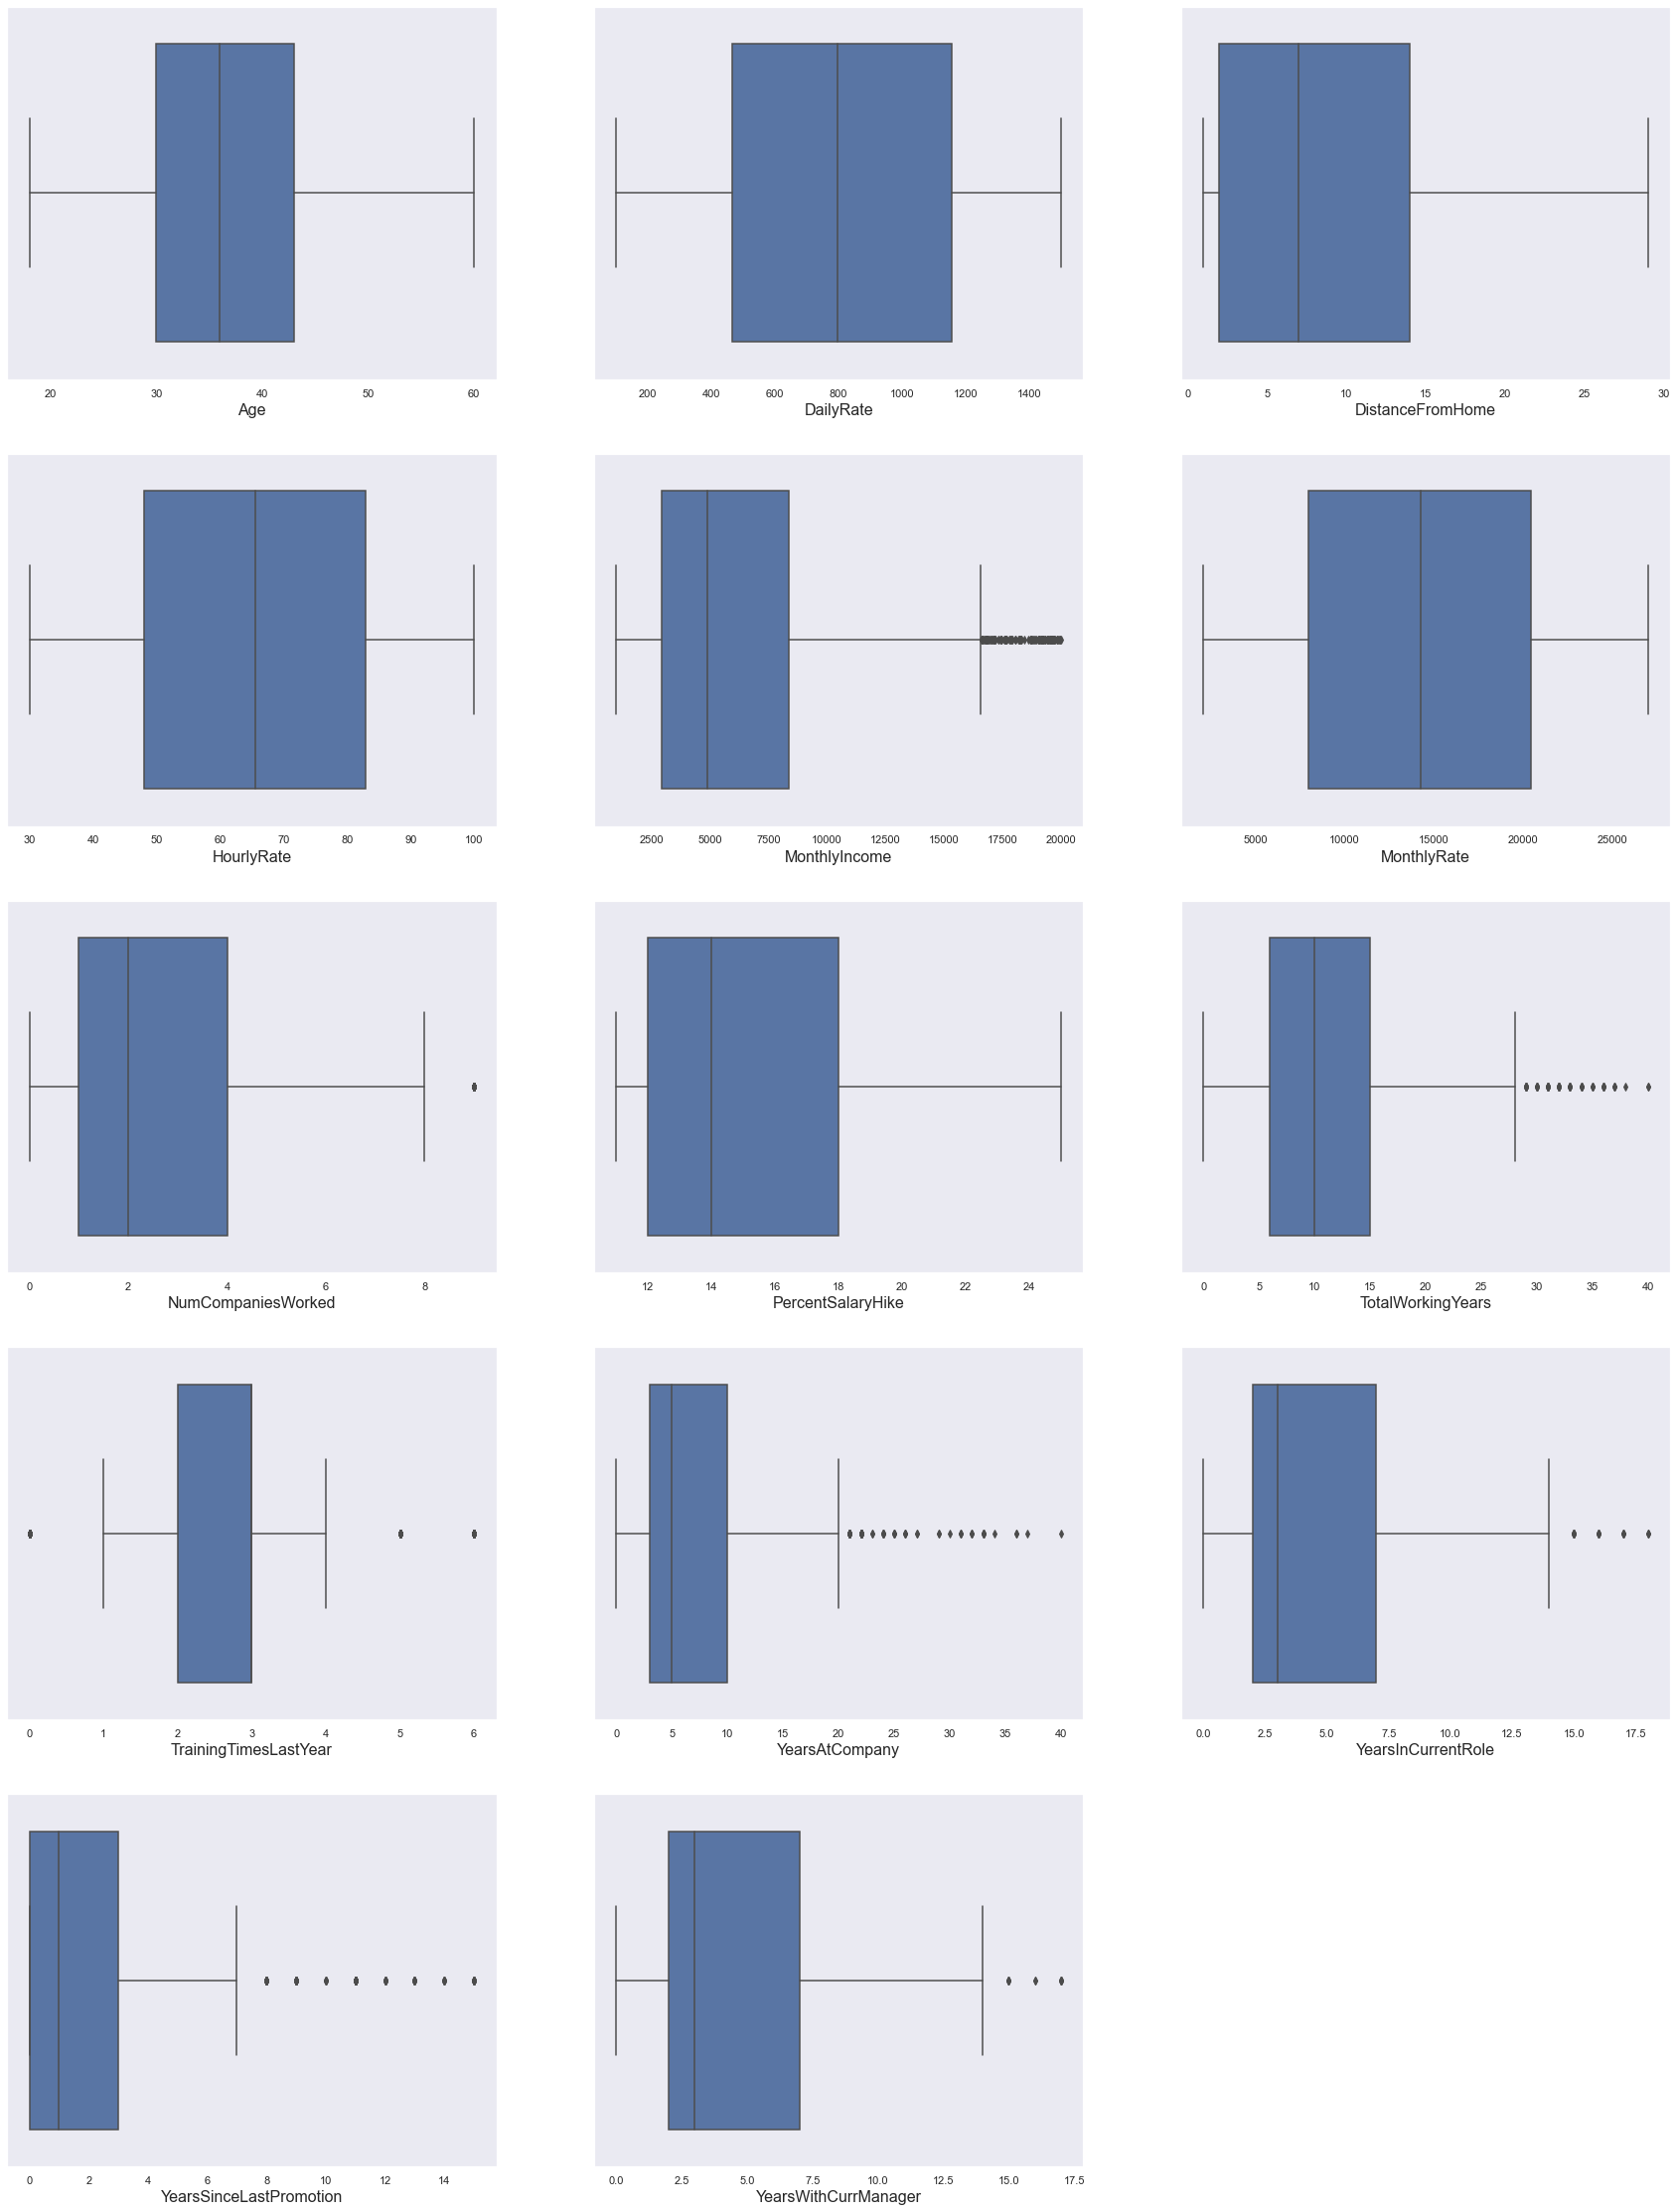

In [13]:
plt.figure(figsize=(30,40))
for i,c in enumerate(df_numbers):
    plt.subplot(5,3,i+1)
    sns.boxplot(data=df_numbers,x=c)
    plt.xlabel(c,fontsize=16)

#### Histograms
Shows distribution of each columns

* Age - shows somewhat close to a normal distribution but still shows left skewness
* DailyRate - not quite of a uniform distribution, but close to it.
* DistanceFromHome - left skewed, most people work close to where they live.
* HourlyRate - much like daily rate, not quite uniform, but close to it
* MonthlyIncome - left skewness
* MonthlyRate - much like daily rate, not quite uniform, but close to it

The following columns show left skewness to their distribution:
* NumCompaniesWorked 
* PercentSalaryHike
* TotalWorkingYears
* YearsAtCompany
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager


We might need to transform some of the fields using scaling options to that they are in normal distribution, lets look to see if it is needed

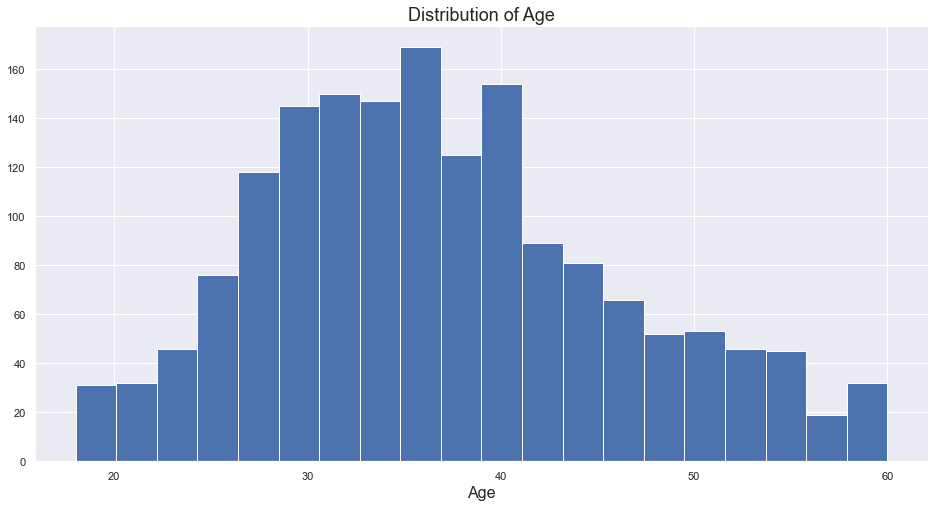

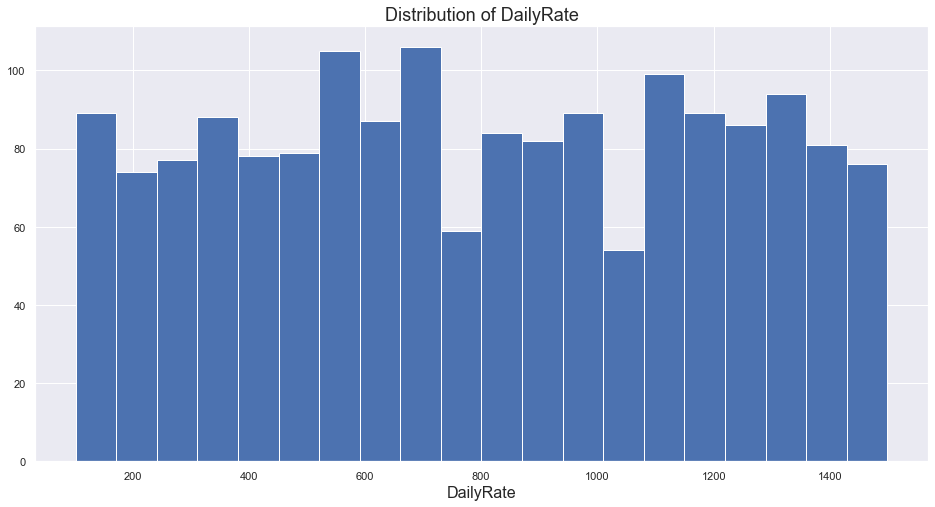

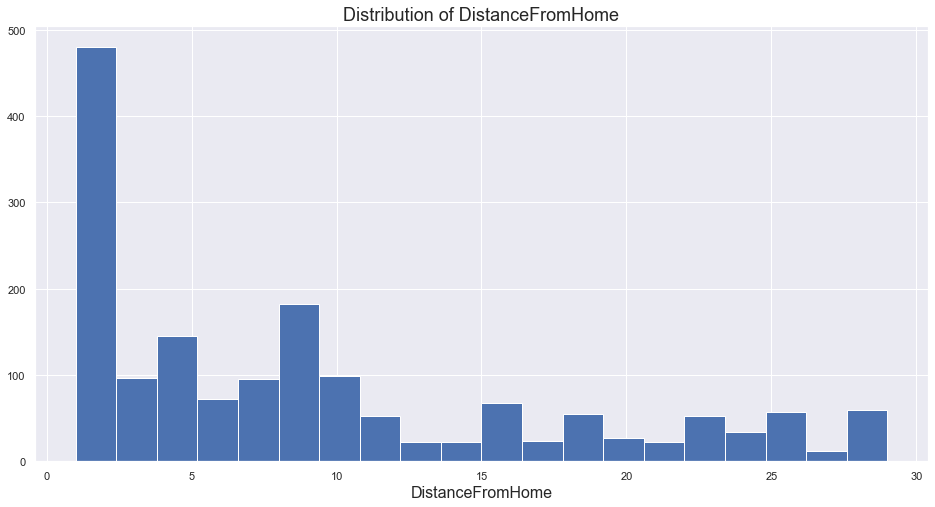

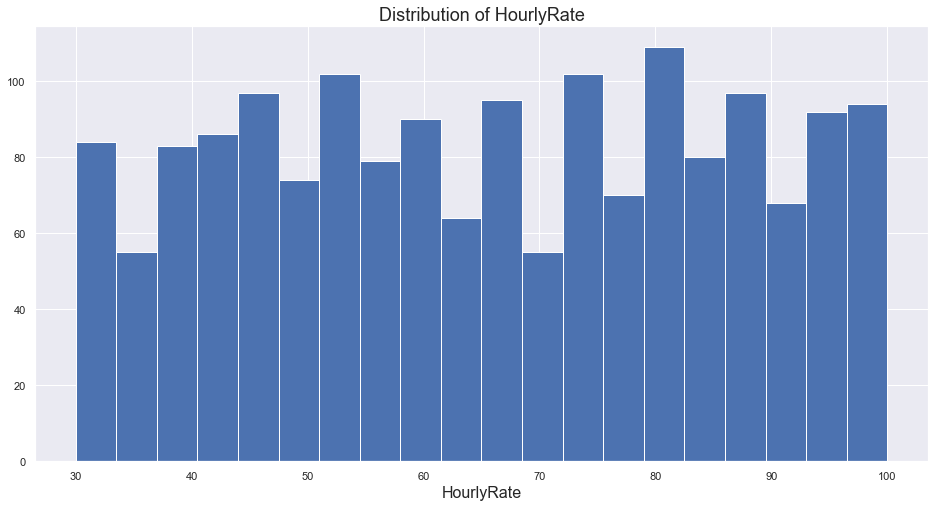

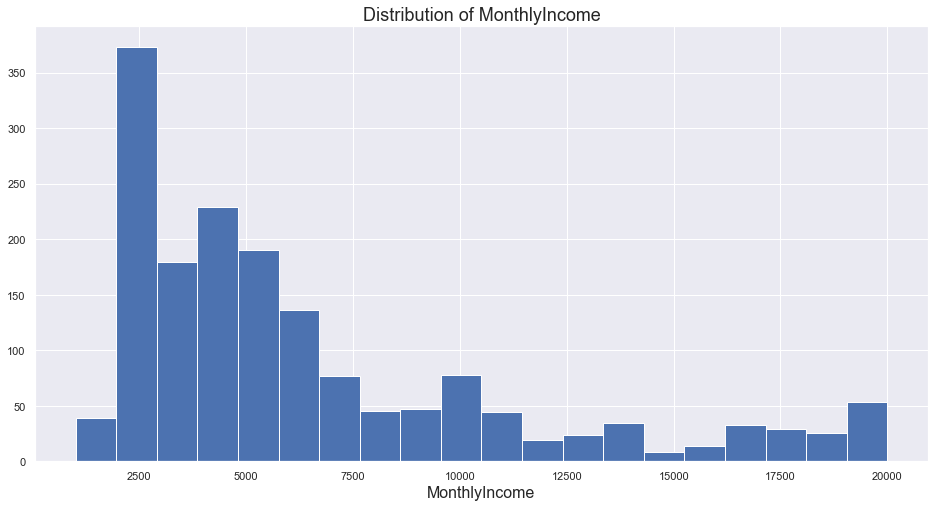

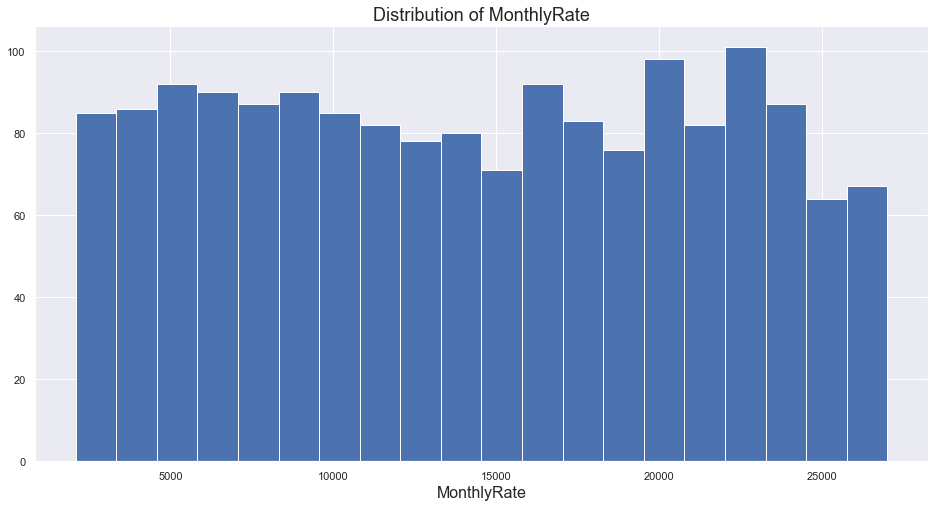

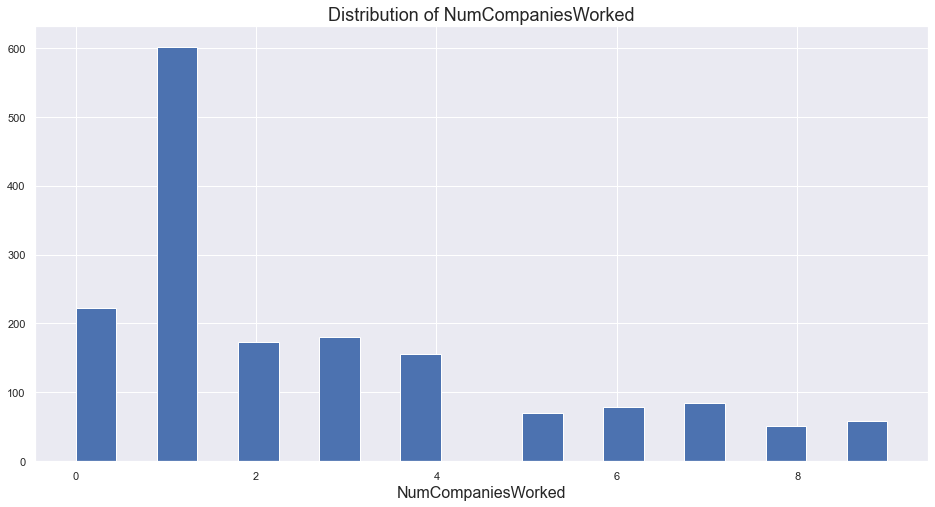

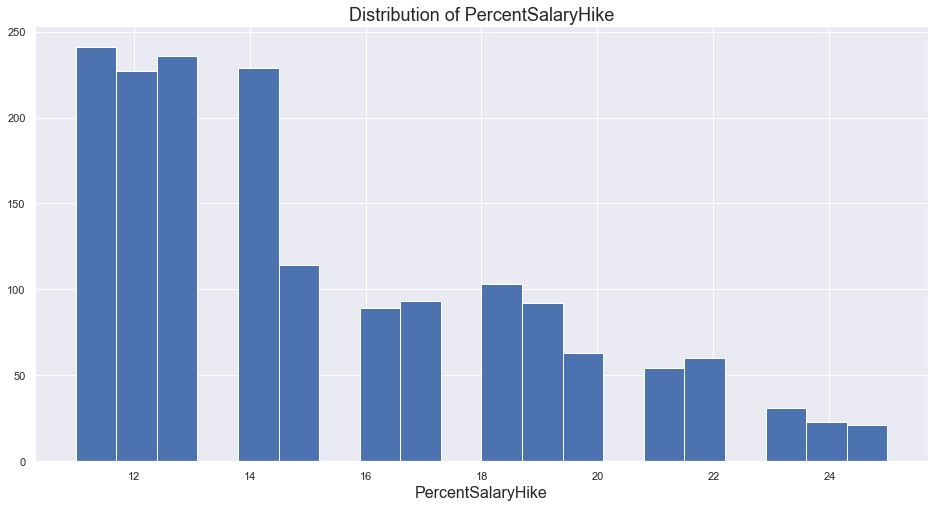

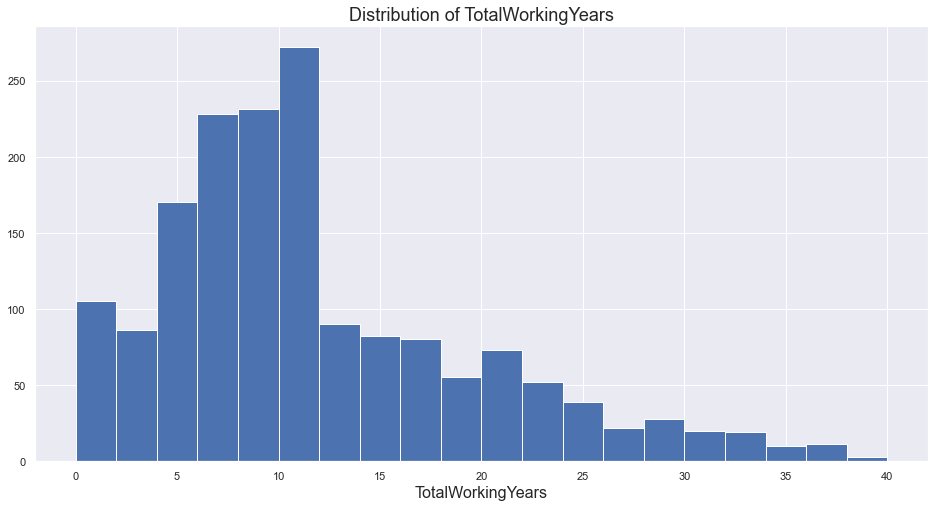

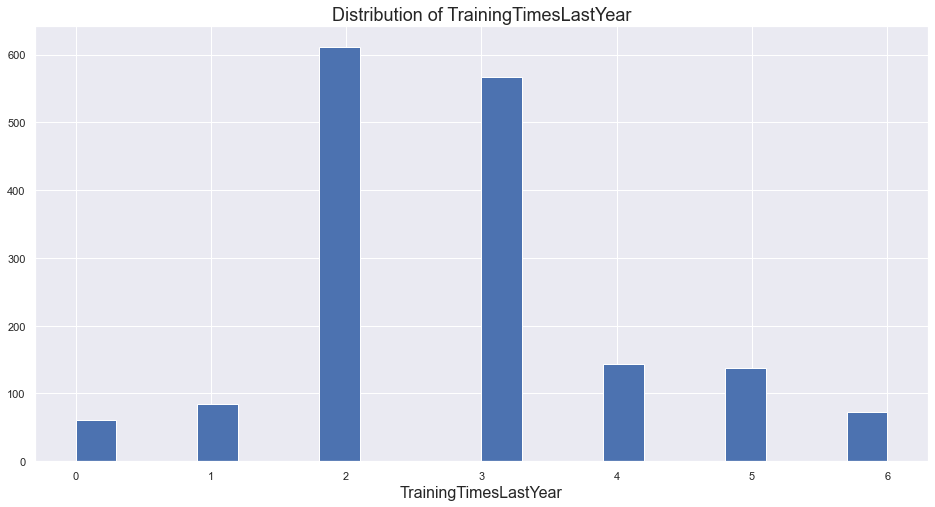

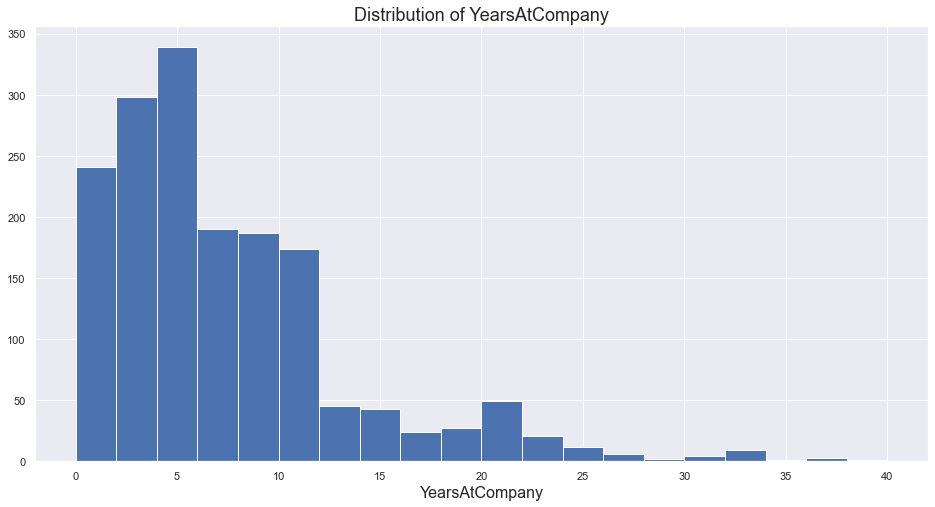

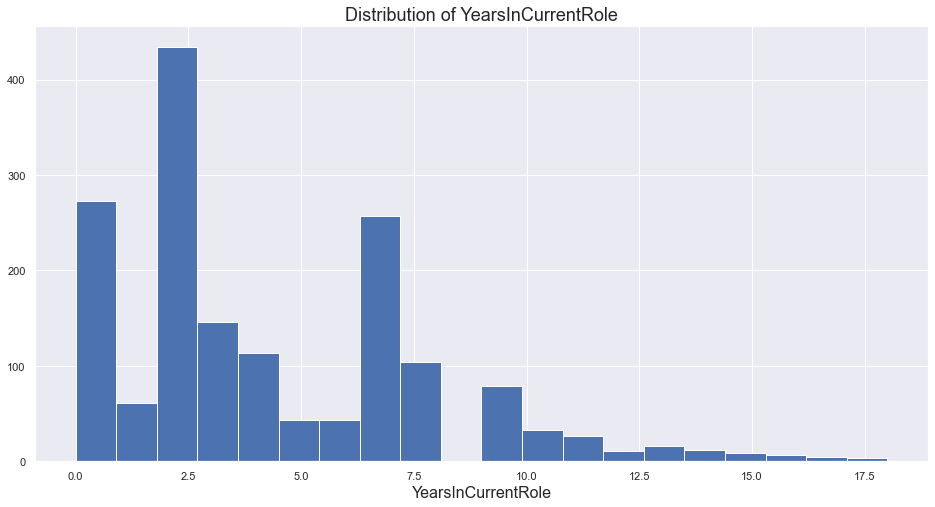

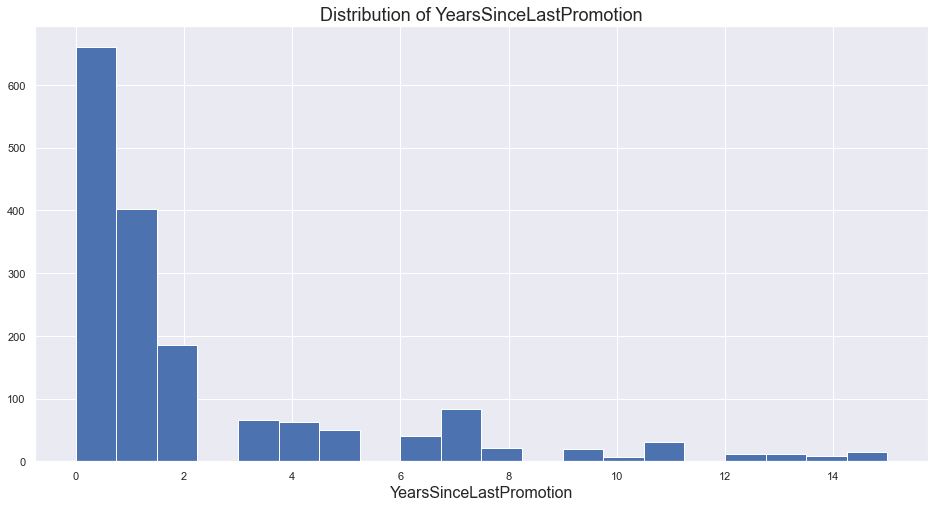

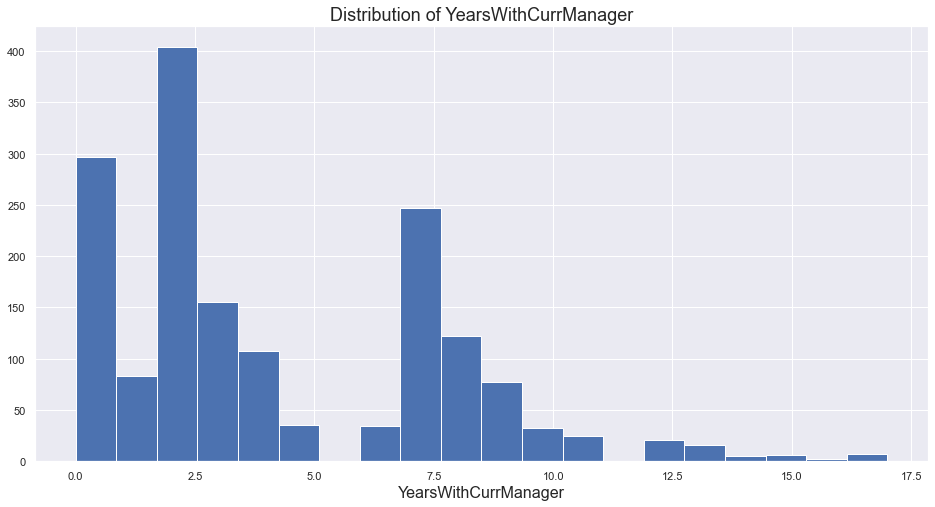

In [14]:
def plot_histogram(data,col,bin_size): 
    plt.figure(figsize=(16,8))
    data[col].hist(bins=bin_size)
    plt.xlabel(col,fontsize=16)
    plt.title('Distribution of {}'.format(col),fontsize=18);
    return

# Plotting Histograms
[plot_histogram(df,c,20) for c in list(cols_number)];
    

##### The following Standard Scaler did not change the distribution from above, so no need to transform the fields

<Figure size 1440x720 with 0 Axes>

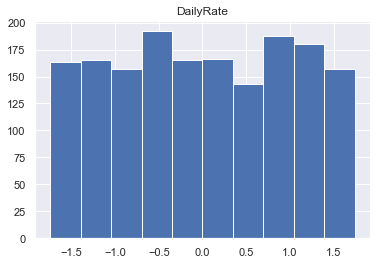

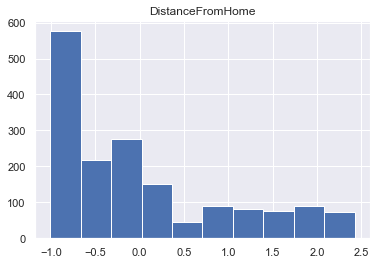

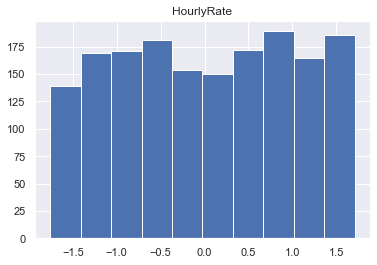

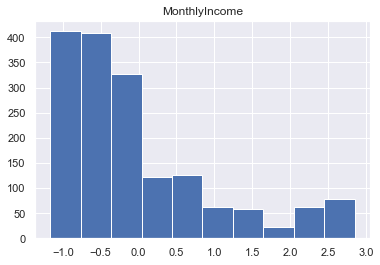

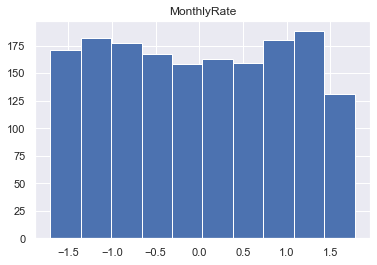

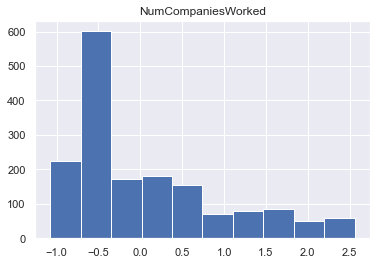

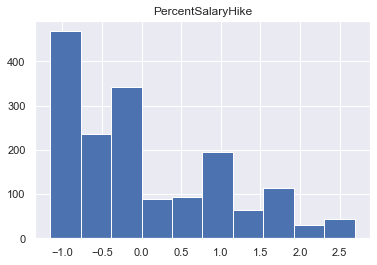

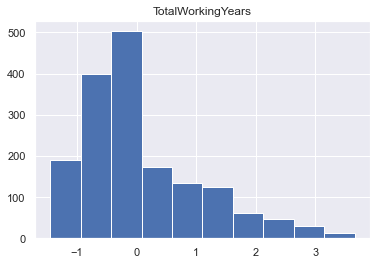

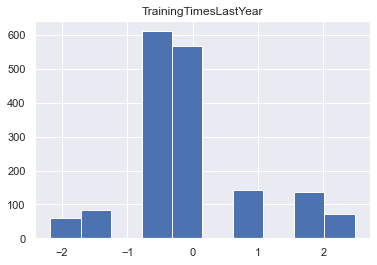

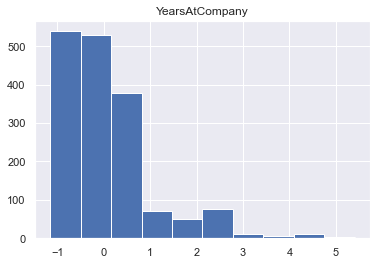

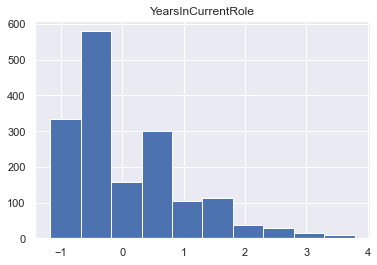

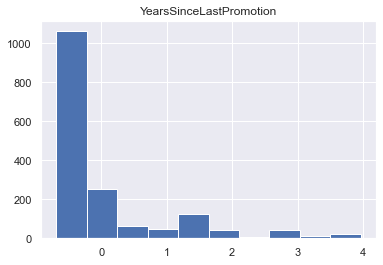

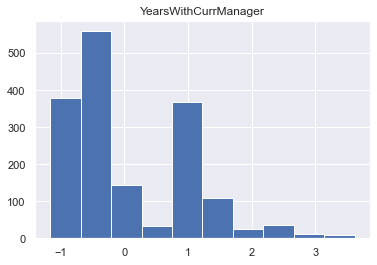

In [116]:
# The following will be transformed by using Standard Scaler
cn = cols_number.values.tolist()
cn.remove('Age')

from numpy import asarray
from sklearn.preprocessing import StandardScaler,MinMaxScaler

plt.figure(figsize=(20,10))
for c in cn:
    x = df1[[c]].values #returns a numpy array
    std_scaler = StandardScaler()
    x_scaled = std_scaler.fit_transform(x)
    g = pd.DataFrame(x_scaled)
    g.hist()
    plt.title(c);

#### Category Columns

Here we will plot categorical fields with respect to whether the employee left the company or not

Count of Each Categorical Variable


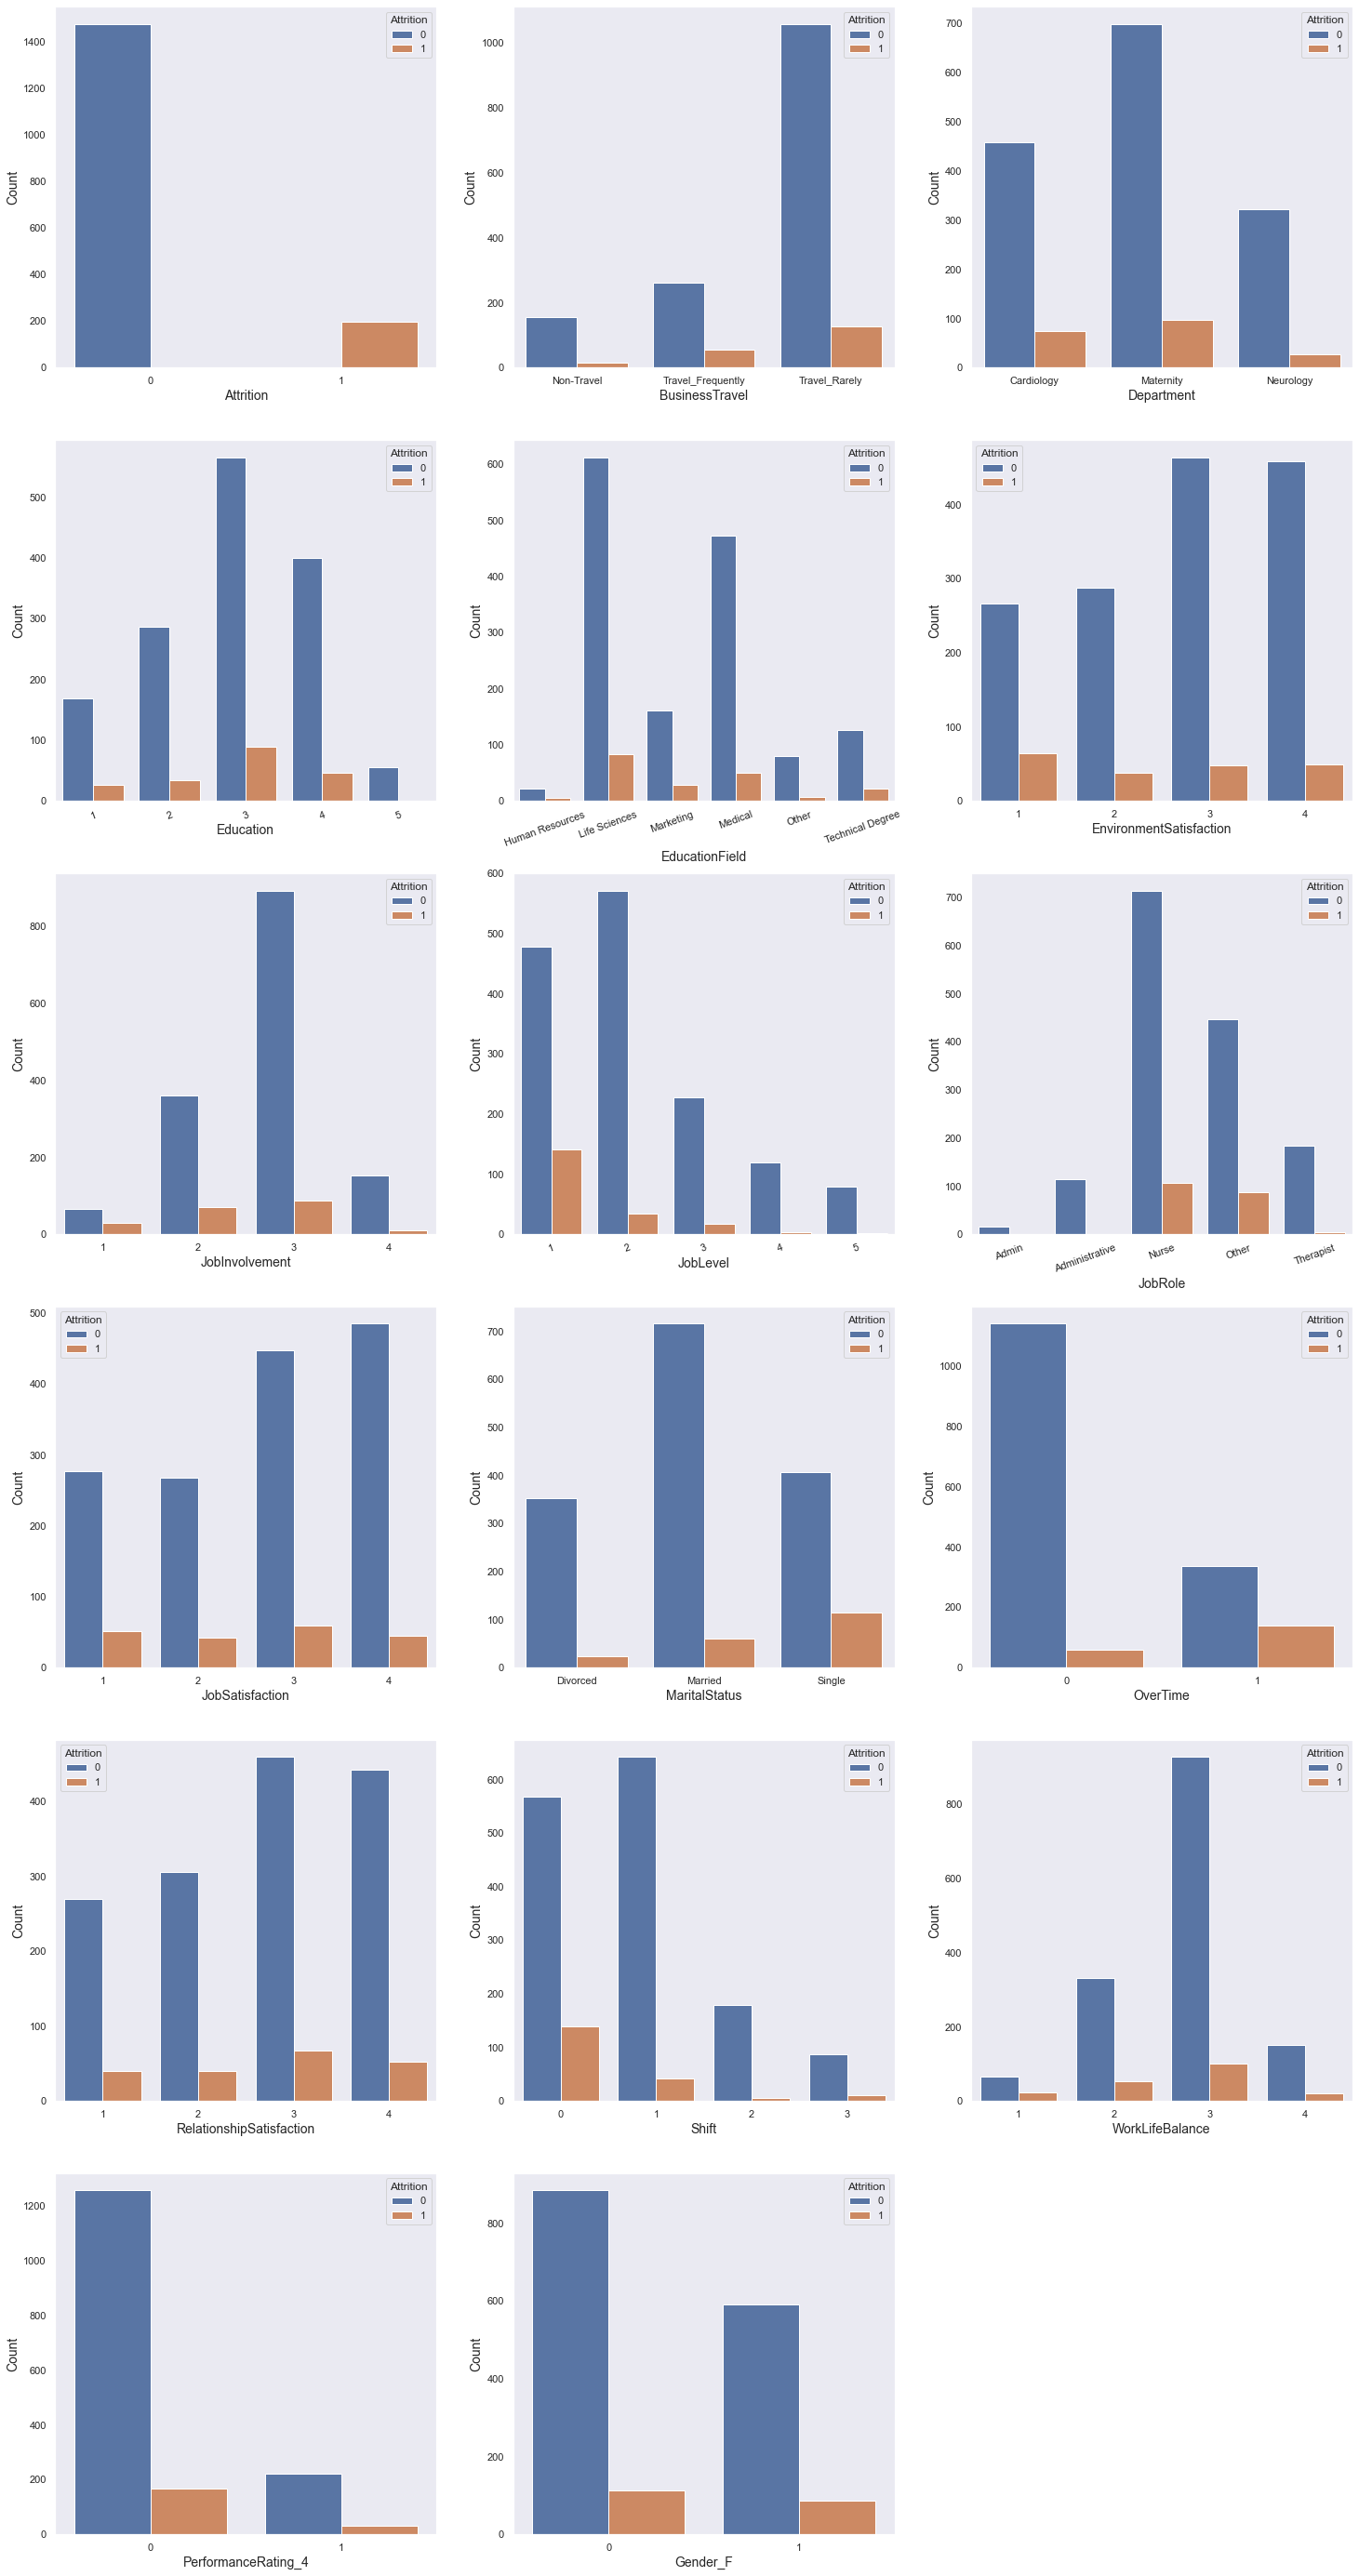

In [239]:
plt.figure(figsize=(25,50))
print ('Count of Each Categorical Variable')
for i,c in enumerate(df_string):
    plt.subplot(6,3,i+1)
        
    sns.countplot(data=df_string,hue='Attrition',x=c,order=sorted(df_string[c].unique()))
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Count',fontsize=14)
    if df_string[c].nunique()>4:
        plt.xticks(rotation=20)
    else:
        pass

### Modeling
We will cover the following models and see how they stack up
* Logistic Regression
    * Recursive Feature Elimination
    * Ridge/Lasso Regularization
* Random Forest
* Extra Trees
* Gradient Boosting
* XGBoost

first thing first, we will need to convert some features to dummy variables, we will do this by using the pandas function getdummies

#### Creating dataframe of dummy variables
Used this as an example for dummy variables and RFE: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


In [37]:
df2 = df1.copy()
# This is the dependent variables
y = df2['Attrition']

df2 = df2.drop(['EmployeeID','Attrition'],axis=1)

In [16]:
# Grabbing the string columns to convert to dummy variables
cat_vars=[x for x in col_string if (x in df2) and (x not in ['PerformanceRating_4','Gender_F'])]
# copying dataframe
data = df2.copy()
# creating dummy for each variable and then joinin with copied df
for var in cat_vars:
    cat_list='var'+'_'+var
    #print (cat_list)
    cat_list = pd.get_dummies(data[var], prefix=var)
    data=data.join(cat_list)

data_vars = data.columns.values.tolist()
cols_keep = [i for i in data_vars if i not in cat_vars]
data_final=data[cols_keep]
data_final.columns.values

array(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating_4', 'Gender_F',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Cardiology',
       'Department_Maternity', 'Department_Neurology', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_1', 'EnvironmentSatisfaction_2',
       'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4',
       'JobInvolvement_1', 'JobInvolvement_2', 'JobInvolvemen

In [54]:
# Creating Train/Test split
X_train, X_test, y_train, y_test = train_test_split(data_final, y, test_size=0.3, random_state=25)

data_final_vars=data_final.columns.values.tolist()
X_cols=[i for i in data_final_vars if i not in y]
X_train = X_train[X_cols]

#### Recursive Feature Elimination

In [190]:
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X, pd.DataFrame(y_train).values.ravel())
#print(rfe.support_)
#print(rfe.ranking_)

In [52]:
rfe_results = pd.DataFrame([X_cols,rfe.support_,rfe.ranking_],index=['Column','Support','Ranking']).T
rfe_results[rfe_results['Support']==True]

,Column,Support,Ranking
14,PerformanceRating_4,True,1
15,Gender_F,True,1
16,BusinessTravel_Non-Travel,True,1
17,BusinessTravel_Travel_Frequently,True,1
20,Department_Maternity,True,1
22,Education_1,True,1
26,Education_5,True,1
27,EducationField_Human Resources,True,1
28,EducationField_Life Sciences,True,1
29,EducationField_Marketing,True,1


#### Logistic Regression

By default, it is L2 Penalty (Lasso)

In [187]:
lr = LogisticRegression(random_state=25)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print ('Logistic Regression Accuracy Score:',accuracy_score(y_test,y_pred).round(4))
lr_cm = confusion_matrix(y_test,y_pred)

Logistic Regression Accuracy Score: 0.8767


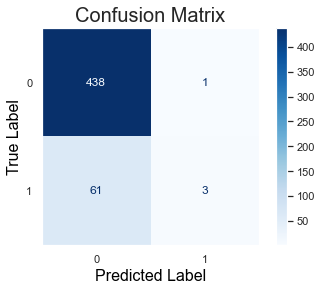

In [188]:

color = 'black'
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm,display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted Label', color=color,fontsize=16)
plt.ylabel('True Label', color=color,fontsize=16)
plt.show();

In [189]:
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       439
           1       0.75      0.05      0.09        64

    accuracy                           0.88       503
   macro avg       0.81      0.52      0.51       503
weighted avg       0.86      0.88      0.83       503

